In [3]:
knitr::opts_chunk$set(echo = TRUE)
library("knitr")
library("dplyr")
library("plotly")
library("ggplot2")
library("tidyverse")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_confl

## 1.1 Linear regression: a basic model for parameter estimation

Here we look more in detail to how the estimation of model parameters works. <br> We have a generating model of the following form:

$$
y = 1.25 \cdot x
$$

The **true** $\theta$ (model parameter: slope) is therefore $1.25$

In [1]:
lin_reg <- function(x) 1.25*x

In [4]:
x = 1
y = lin_reg(x)
print(paste("y as function of x=1 in the model above:",y))

## now apply the function to a bunch of data
x = seq(-5,+5,0.5) ## independent variable
y = lin_reg(x) ## dependent variable

kable(data.frame("x" = x, "y" = y))

[1] "y as function of x=1 in the model above: 1.25"




|    x|      y|
|----:|------:|
| -5.0| -6.250|
| -4.5| -5.625|
| -4.0| -5.000|
| -3.5| -4.375|
| -3.0| -3.750|
| -2.5| -3.125|
| -2.0| -2.500|
| -1.5| -1.875|
| -1.0| -1.250|
| -0.5| -0.625|
|  0.0|  0.000|
|  0.5|  0.625|
|  1.0|  1.250|
|  1.5|  1.875|
|  2.0|  2.500|
|  2.5|  3.125|
|  3.0|  3.750|
|  3.5|  4.375|
|  4.0|  5.000|
|  4.5|  5.625|
|  5.0|  6.250|

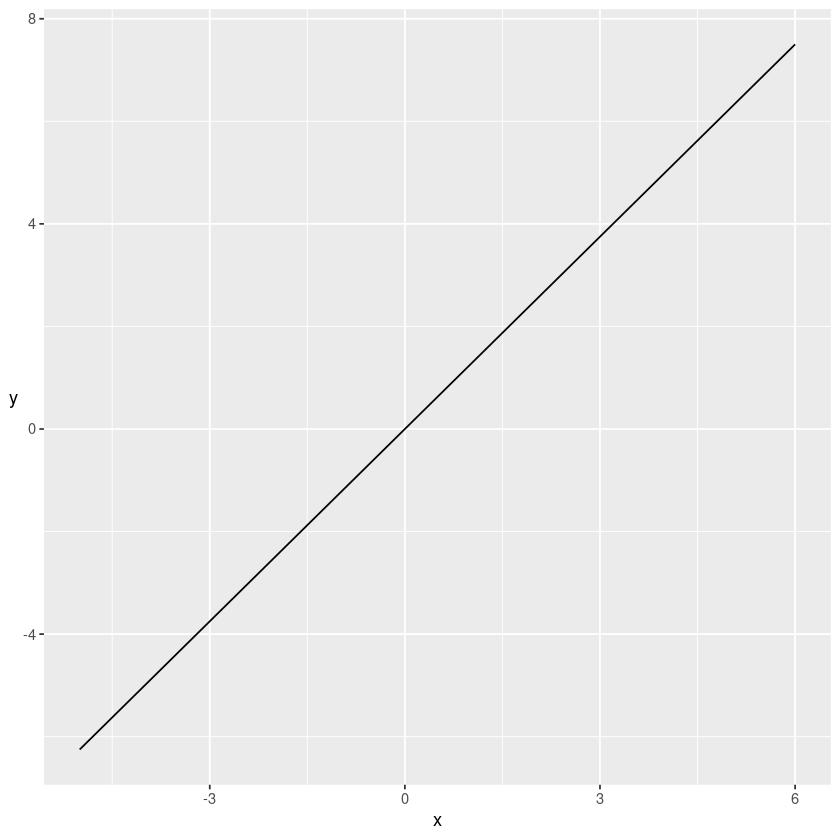

In [5]:
p <- ggplot(data = data.frame(x = 0), mapping = aes(x = x))
p <- p + stat_function(fun = lin_reg) + xlim(-5,6)
p <- p + theme(axis.title.y = element_text(angle=0, vjust = 0.5))
p

### The loss function

For linear regression (simple or multiple, as long as $n > p$), the least squares method can be used, where the residual sum of squares is minimised through differentiation of vector and matrix expressions (linear algebra $\rightarrow$ *normal equations*).

However, from the perspective of machine learning a different approach is taken. First, a **loss function** is chosen: a common choice for (multiple) linear regression is the **normalised squared error function**:

In [6]:
loss_function <- function(x,beta) {
  
  n = length(x)
  y = lin_reg(x)
  normalised_squared_error = sum((y - beta*x)^2)/(2*n)
  
  return(normalised_squared_error)
}

We then calculate the loss function for different values of the parameter(s) to estimate.
We take 11 datapoints (from 0 to 10) for our linear regression model and try different values for beta:

In [9]:
x <- seq(0,10,0.25)
beta <- seq(0.25,2.25,0.05)

cost <- sapply(beta, function(z) loss_function(x,z))
res <- data.frame("x" = x, "beta" = beta, "loss" = cost)
beta_min = res[which.min(res$loss),"beta"]
print(res)

       x beta       loss
1   0.00 0.25 16.8750000
2   0.25 0.30 15.2296875
3   0.50 0.35 13.6687500
4   0.75 0.40 12.1921875
5   1.00 0.45 10.8000000
6   1.25 0.50  9.4921875
7   1.50 0.55  8.2687500
8   1.75 0.60  7.1296875
9   2.00 0.65  6.0750000
10  2.25 0.70  5.1046875
11  2.50 0.75  4.2187500
12  2.75 0.80  3.4171875
13  3.00 0.85  2.7000000
14  3.25 0.90  2.0671875
15  3.50 0.95  1.5187500
16  3.75 1.00  1.0546875
17  4.00 1.05  0.6750000
18  4.25 1.10  0.3796875
19  4.50 1.15  0.1687500
20  4.75 1.20  0.0421875
21  5.00 1.25  0.0000000
22  5.25 1.30  0.0421875
23  5.50 1.35  0.1687500
24  5.75 1.40  0.3796875
25  6.00 1.45  0.6750000
26  6.25 1.50  1.0546875
27  6.50 1.55  1.5187500
28  6.75 1.60  2.0671875
29  7.00 1.65  2.7000000
30  7.25 1.70  3.4171875
31  7.50 1.75  4.2187500
32  7.75 1.80  5.1046875
33  8.00 1.85  6.0750000
34  8.25 1.90  7.1296875
35  8.50 1.95  8.2687500
36  8.75 2.00  9.4921875
37  9.00 2.05 10.8000000
38  9.25 2.10 12.1921875
39  9.50 2.15 13.6687500


In [10]:
print(paste("parameter value for which the cost function is minimised:", beta_min))

[1] "parameter value for which the cost function is minimised: 1.25"


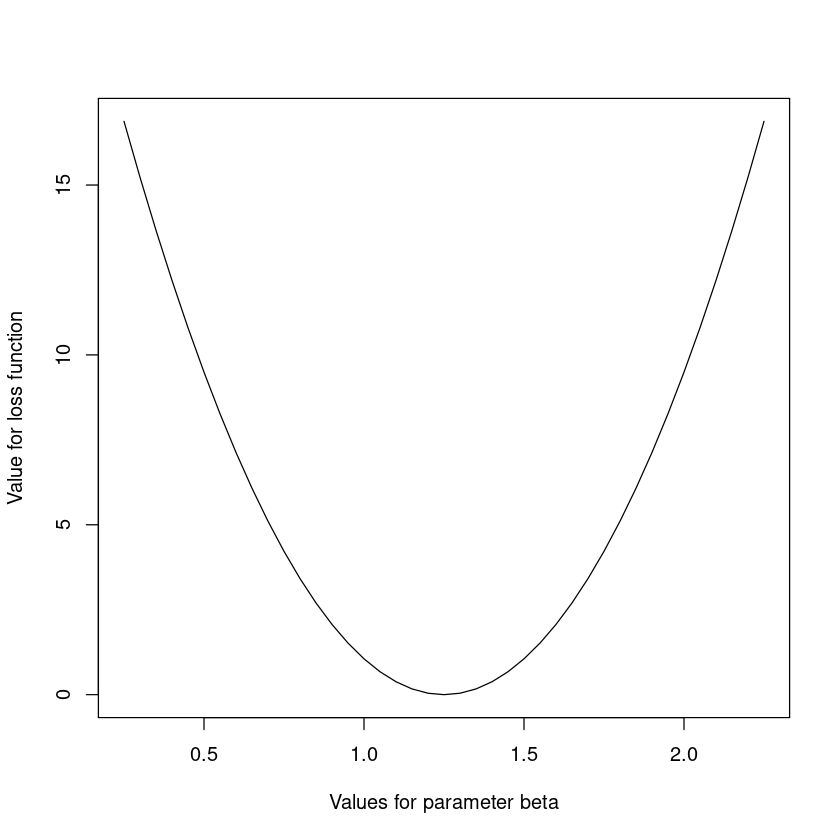

In [11]:
plot(beta,cost, type="l",xlab = "Values for parameter beta", ylab = "Value for loss function")

Note: sometimes the term **loss function** is used to define the individual loss (each single record, i.e. $(y_i-\hat{y_i})^2$) and the term **cost function** is used for the summ of individual losses

### Exercise 1.1

Try to estimate your own model coefficient:

1. Create your generating (true) model (dare try with the intercept, too?):

In [ ]:
lin_reg.1 <- function() {}

2. Define your own loss function:

In [ ]:
loss_function.1 <- function() {

}

3. Create your dataset:

In [ ]:
x <- seq()

4. Choose a set of values for $\beta$ to be tested

In [ ]:
beta0 = 
beta1 = 


5. Calculate the values for the loss function and plot results

In [ ]:
cost =
print(cost)

6. Plot the cost function vs values of the parameter(s)

In [ ]:
library("plotly")

## 1.2 Linear regression: measuring performance

In practice, we are not going to manually minimise the loss function to estimate model parameters for our predictive machine: instead, higher-level *R* functions are used, like `lm()`.

An important aspect of predictive statistics is to measure the performance of the developed predictive model (predictive machine).

Let's start by creating an artificial dataset sampling from a normal distribution:

In [12]:
y <- rnorm(n = 100, mean = 0, sd = 1)
x <- rnorm(n = 100, mean = 0, sd = 1)

dataset <- data.frame("y"=y, "x"=x)
kable(head(dataset))



|          y|          x|
|----------:|----------:|
|  0.2436654|  1.2237574|
|  1.7202509|  1.9594928|
| -0.2818991| -1.1980974|
| -1.8167720|  1.7835584|
| -0.4129311| -1.7208513|
|  0.6975352| -0.2312617|

We now fit a simple linear regression model:

$$
y = \mu + \beta \cdot x + e
$$

In [13]:
fit <- lm(y ~ x, data = dataset)
coef(fit)

(Intercept)             x 
-0.0006347418 -0.0487361208

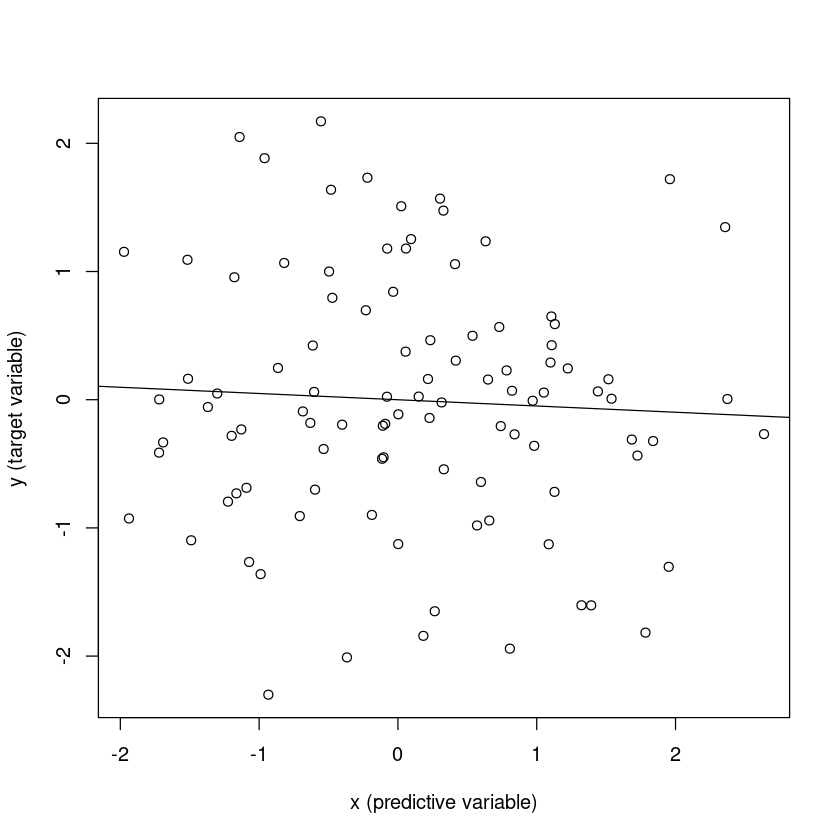

In [14]:
plot(dataset$x, dataset$y, ylab = "y (target variable)", xlab = "x (predictive variable)")
abline(fit)

We now have all the ingredients to obtain predictions: either by explicitly using the estimated coefficients:

In [15]:
predictions <- dataset$x*coef(fit)[2] + coef(fit)[1]

or by using the *R* `predict()` function:

In [17]:
# ?predict
predictions <- predict(fit, newdata = dataset)

The two approaches are obviously equivalent

In [18]:
concordance <- predict(fit, newdata = dataset) == dataset$x*coef(fit)[2] + coef(fit)[1]
sum(concordance)/length(predictions)

[1] 1

The predict function is more flexible and can for instance also give us a confidence interval for predictions:

In [19]:
predict(fit, newdata = dataset, interval = "confidence") %>%
  head() %>%
  kable()



|        fit|        lwr|       upr|
|----------:|----------:|---------:|
| -0.0602759| -0.3414359| 0.2208840|
| -0.0961328| -0.4857011| 0.2934354|
|  0.0577559| -0.2472696| 0.3627813|
| -0.0875585| -0.4496539| 0.2745370|
|  0.0832329| -0.3002446| 0.4667103|
|  0.0106361| -0.1914821| 0.2127542|

Finally, we can plot predictions against observations:

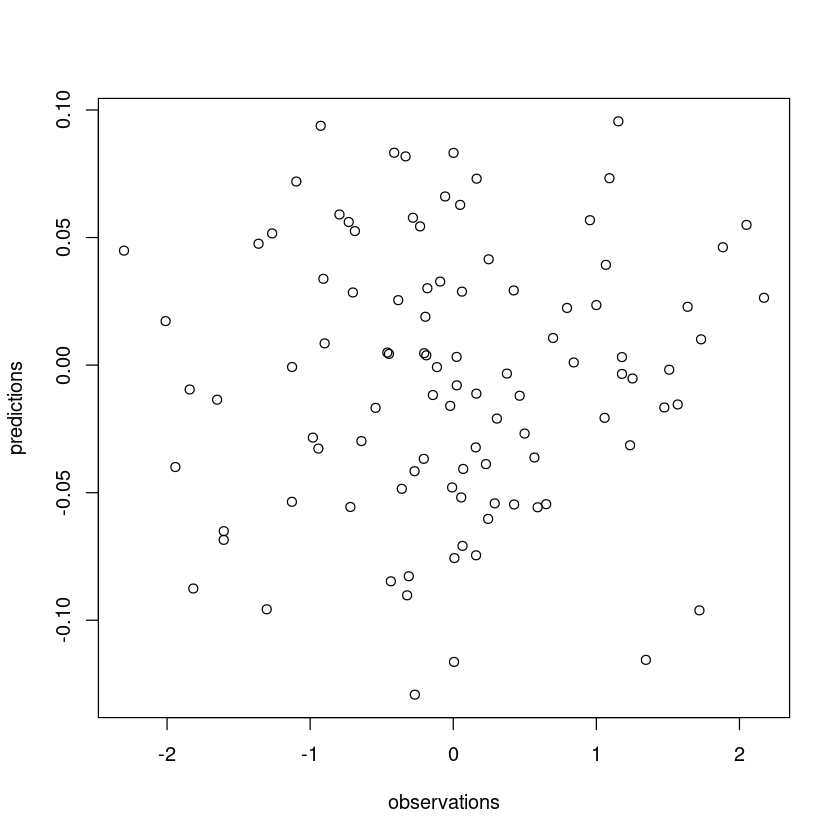

In [20]:
dataset$predictions <- predictions
plot(dataset$y, dataset$predictions, xlab = "observations", ylab = "predictions")
#abline(fit)

Besides visualizing how predictions relate to observations, we need also to measure (quantify) the predictive performance of the model.

Several metrics exist for regression problems. Here we list a few of the most commonly used.

1. **MSE** (mean squared error)

In [21]:
mse <- function(y,y_hat) {
  
  n = length(y)
  se = sum((y-y_hat)^2)
  mse = se/n
  
  return(mse)
}

error = mse(y = dataset$y, y_hat = predictions)
error

[1] 0.9261256

The MSE is **`r round(error,3)`**.

2. **RMSE** (root mean squared error): this is on the same scale as the target variable

In [22]:
rmse = sqrt(error)
rmse

[1] 0.9623542

The RMSE is **`r round(rmse,3)`**.

3. **MAE** (mean absolute error)

In [23]:
mae <- function(y,y_hat) {
  
  n = length(y)
  se = sum(abs(y-y_hat))
  mae = se/n
  
  return(mae)
}

error = mae(y = dataset$y, y_hat = predictions)
error

[1] 0.7487469

The MAE is **`r round(error,3)`**.

The we have correlations:

4. **Pearson's linear** correlation coefficient
5. **Spearman's rank** correlation coefficient

In [24]:
r_pearson = cor(dataset$y, predictions, method = "pearson")
r_spearman = cor(dataset$y, predictions, method = "spearman")

In [25]:
print(r_pearson)
print(r_spearman)

[1] 0.05359899
[1] 0.01750975


## Exercise 1.2

Generate a dataset, fit a linear model and measure the accuracy of predictions:

1. Generate a dataset (you can pick a different distribution e.g. t-student, chi-square etc., or you can choose one of the many built-in R datasets, using the function `data()`):

In [ ]:
data()

y = NULL # target variable
x = NULL # feature 1
z = NULL # feature 2 (optional)

2. Fit a linear model

In [ ]:
# fit <- lm()

3. Obtain predictions

In [ ]:
# predictions <- predict()

4. Plot observations vs predictions

In [ ]:
# p <- ggplot()

5. Choose a metric to measure the accuracy of predictions (performance)

In [ ]:
# metric = 